In [1]:
import sys
sys.path

['/home/localdmonte/fs-ensembles',
 '/home/localdmonte/Fitsnap_4_python_path/FitSNAP',
 '/home/localdmonte/.conda/envs/Fitnsap_NN_23/lib/python310.zip',
 '/home/localdmonte/.conda/envs/Fitnsap_NN_23/lib/python3.10',
 '/home/localdmonte/.conda/envs/Fitnsap_NN_23/lib/python3.10/lib-dynload',
 '',
 '/home/localdmonte/.local/lib/python3.10/site-packages',
 '/home/localdmonte/.conda/envs/Fitnsap_NN_23/lib/python3.10/site-packages']

In [2]:
import numpy as np
import pickle
import torch
from pathlib import Path

In [3]:

import seaborn as sns
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator
from matplotlib.ticker import MaxNLocator

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

rc('font',size=12)
rc('font',family='serif')
rc('axes',labelsize=12)
rc('text', usetex=True)



In [4]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import glob

import torch
import torch.utils.data

plt.style.use('default')

from matplotlib import colors as mcolors
colors = dict(mcolors.TABLEAU_COLORS)
colors_more=[]
for key in colors:
#     print(key)
    colors_more.append(key)
    
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator

rc('font',size=14)
rc('font',family='serif')
rc('axes',labelsize=18)


# Load config file

In [5]:
import time

t0 = time.time()


with open(r"USPEX_config_file/configs.pickle", "rb") as file:
    configs = pickle.load(file)
    

t1 = time.time()

total = t1-t0

print('Total time (s) to load config file',total)

len(configs)

configs

print(configs[0].filename)
print(configs[0].natoms)
print(configs[0].descriptors.shape)

from tqdm import tqdm
name_list_energy=[]

for i in tqdm(range(len(configs))):
    name_list_energy.append(configs[i].filename)

print(len(name_list_energy))

name_list_forces=[]

for i in tqdm(range(len(configs))):
    for j in range(configs[i].natoms*3):
        
        name_list_forces.append(configs[i].filename)

print(len(name_list_forces))


Total time (s) to load config file 2.1534230709075928
Ni_uspex_32_6.json
32
(32, 55)


100%|█████████████████████████████████████████████████████████████████████████████████| 8005/8005 [00:00<00:00, 1789066.10it/s]


8005


100%|██████████████████████████████████████████████████████████████████████████████████| 8005/8005 [00:00<00:00, 114110.45it/s]

768480


# Load the model responses

## Collected-changes branch

In [6]:
with open("energies_model_collected_changes"+str(1).zfill(2), "rb") as fp:   # Unpickling
    
    NN_1_collected_changes = pickle.load(fp)
 

In [7]:
NN_1_energy_collected_changes =torch.stack(NN_1_collected_changes).detach().numpy()

In [8]:
NN_1_energy_per_atom_collected_changes=np.zeros([len(NN_1_energy_collected_changes),1])

for i in tqdm(range(len(configs))):
    NN_1_energy_per_atom_collected_changes[i]=NN_1_energy_collected_changes[i]/configs[i].natoms
    
    

100%|██████████████████████████████████████████████████████████████████████████████████| 8005/8005 [00:00<00:00, 981191.84it/s]


# Latest fitsnap branch

In [9]:
with open("energies_model_latest_fitsnap"+str(1).zfill(2), "rb") as fp:   # Unpickling
    
    NN_1_latest_fitsnap = pickle.load(fp)
 

In [10]:
NN_1_energy_latest_fitsnap =torch.stack(NN_1_latest_fitsnap).detach().numpy()

In [11]:
NN_1_energy_per_atom_latest_fitsnap=np.zeros([len(NN_1_energy_latest_fitsnap),1])

for i in tqdm(range(len(configs))):
    NN_1_energy_per_atom_latest_fitsnap[i]=NN_1_energy_latest_fitsnap[i]/configs[i].natoms
    
    

100%|██████████████████████████████████████████████████████████████████████████████████| 8005/8005 [00:00<00:00, 964117.83it/s]


# True Values

In [12]:
print(configs[0].energy)
print(configs[0].natoms)
print(configs[0].natoms*configs[0].energy)

true_energy_per_atom=np.zeros([len(configs),1])
true_energy=np.zeros([len(configs),1])

for i in tqdm(range(len(configs))):
    true_energy_per_atom[i]=configs[i].energy
    true_energy[i]=configs[i].natoms*configs[i].energy
    


-5.3063181759375
32
-169.80218163


100%|██████████████████████████████████████████████████████████████████████████████████| 8005/8005 [00:00<00:00, 744779.48it/s]


# Plot the distributions

/tmp/ipykernel_3419429/3870127632.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NN_1_energy_latest_fitsnap, hist=False, kde=True,
/tmp/ipykernel_3419429/3870127632.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NN_1_energy_collected_changes, hist=False, kde=True,
/t

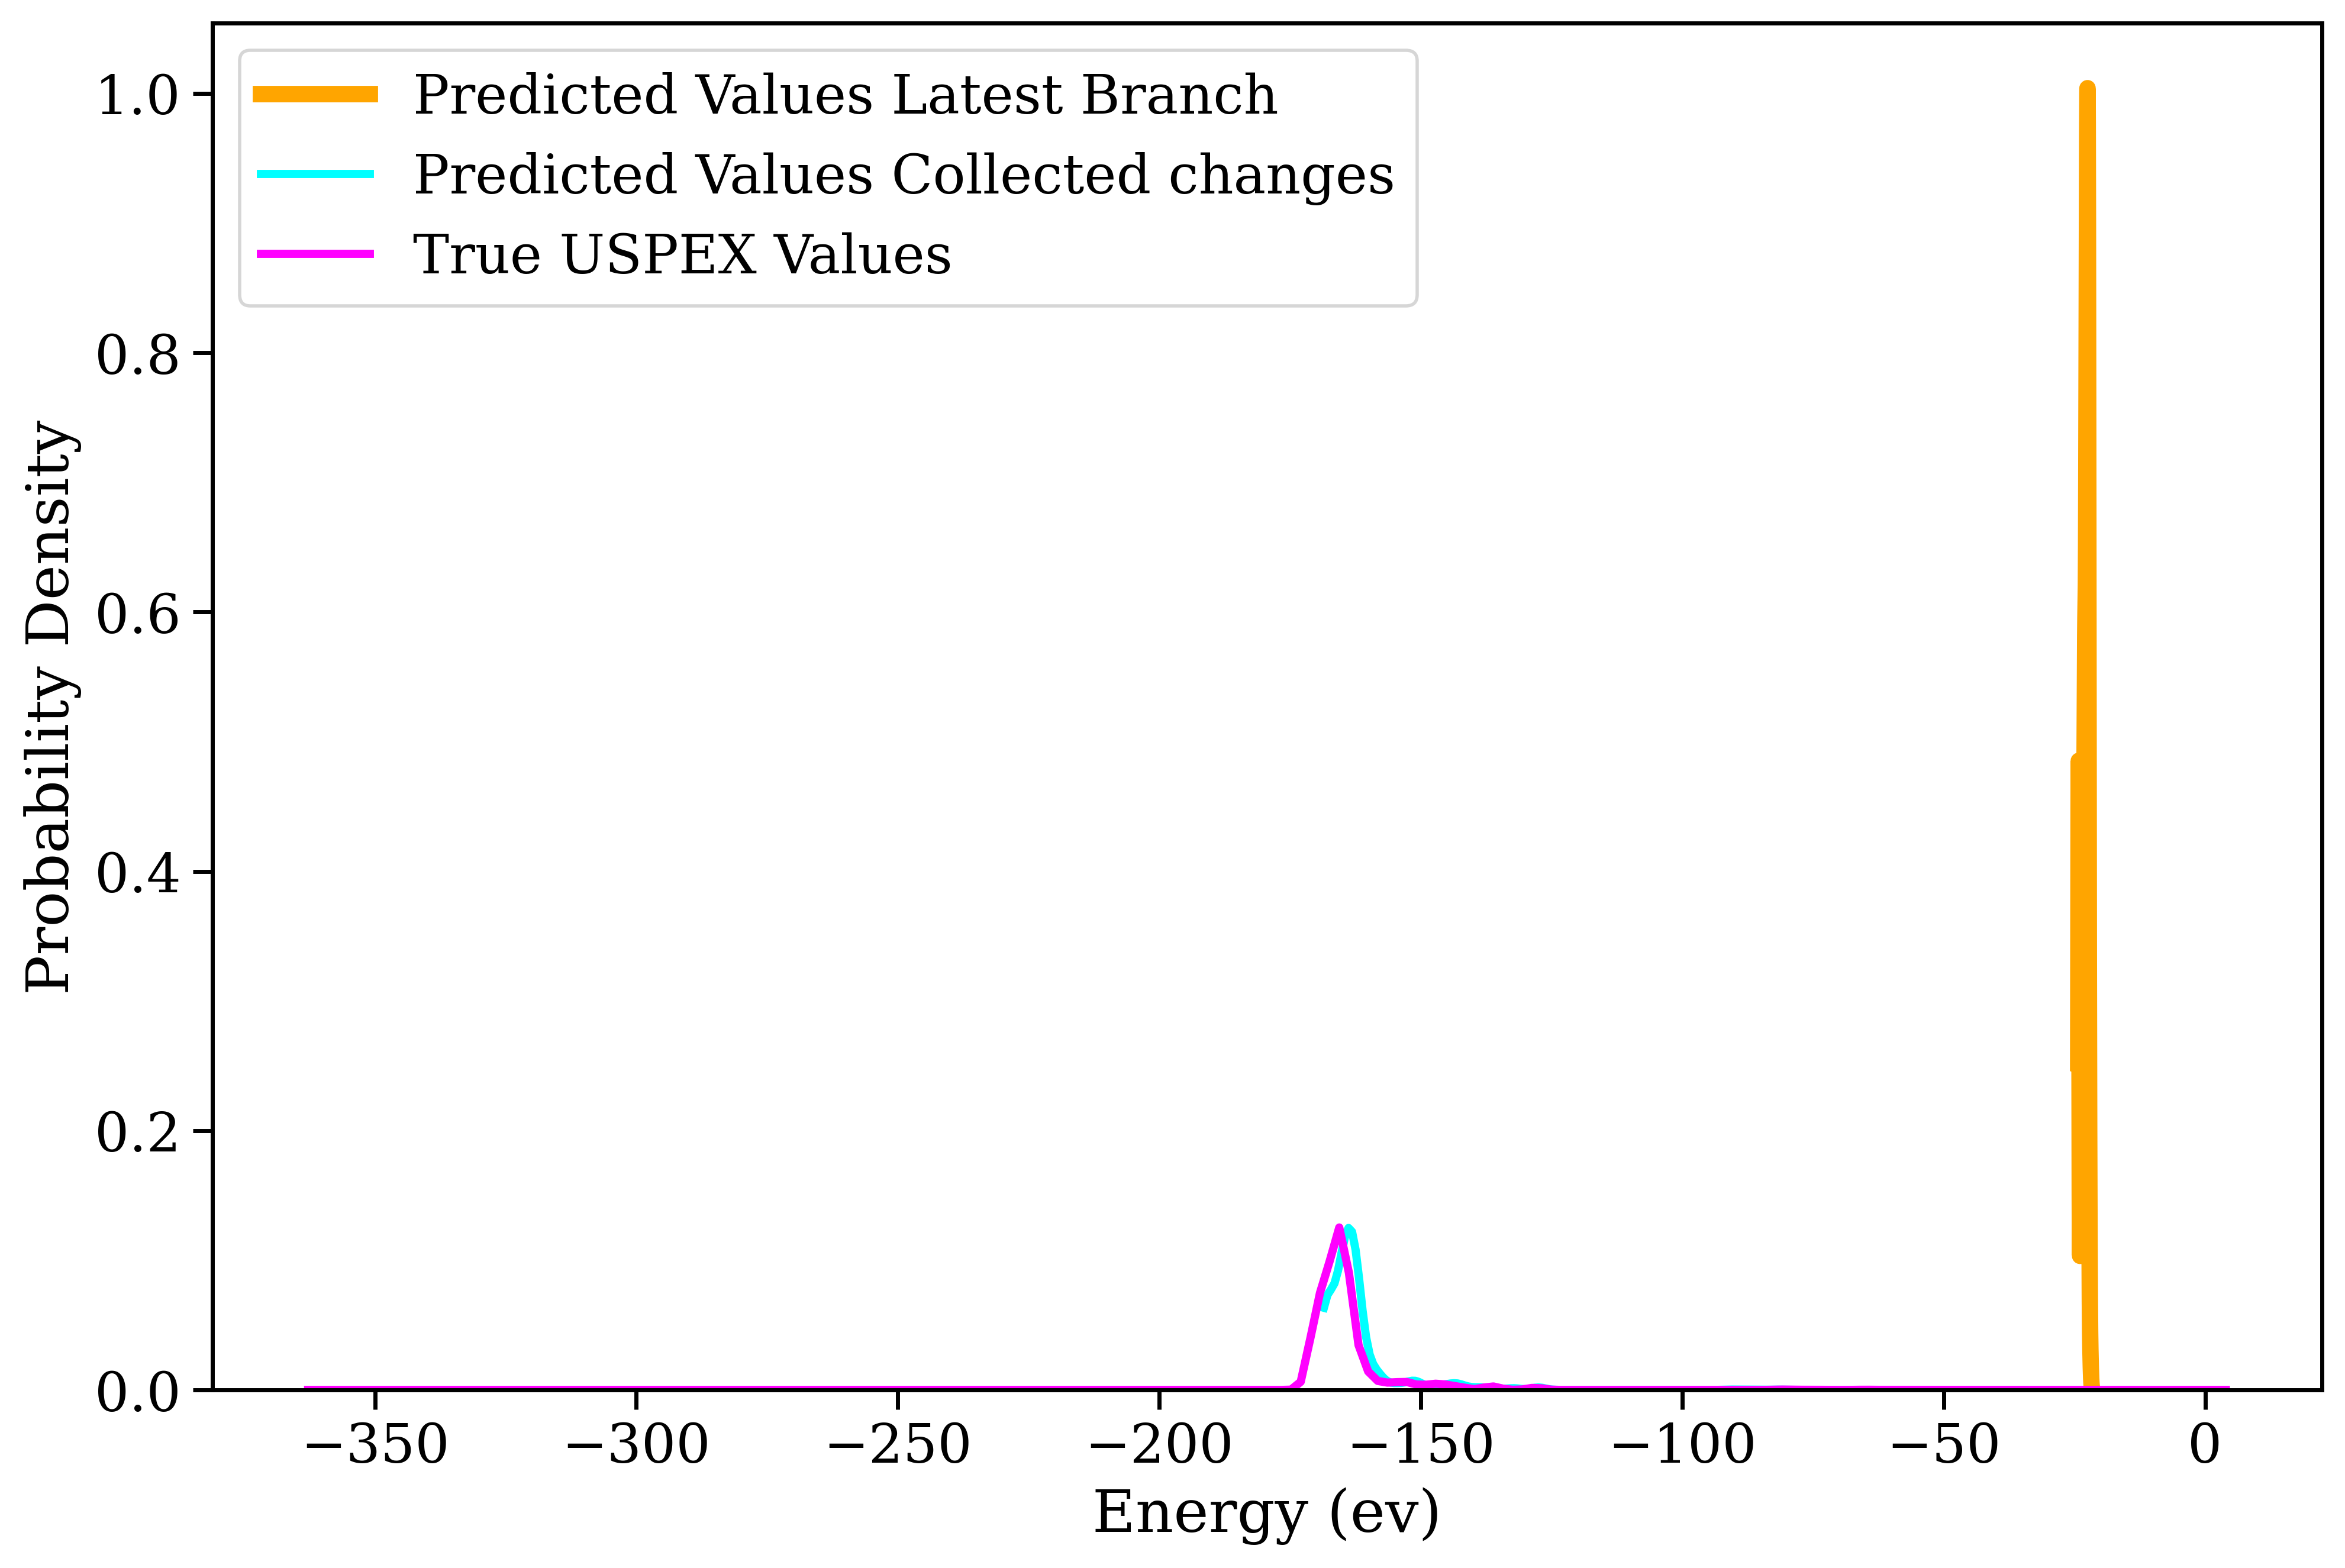

In [13]:
# all_vals_pred=angle_1_pred_train1
# all_vals_true=gb_val_true
fig = plt.figure(figsize=(11.5, 7.5), dpi=400)
fig.patch.set_facecolor('xkcd:white')

sns.set_context("notebook", font_scale=1.5)

sns.distplot(NN_1_energy_latest_fitsnap, hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'},
             kde_kws={'clip': ((NN_1_energy_latest_fitsnap).min(),
                               (NN_1_energy_latest_fitsnap).max()),'linewidth':5},
             label='Predicted Values Latest Branch ')

sns.distplot(NN_1_energy_collected_changes, hist=False, kde=True, 
             bins=int(180/5), color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'clip': ((NN_1_energy_collected_changes).min(),
                               (NN_1_energy_collected_changes).max()),'linewidth':2.5},
             label='Predicted Values Collected changes')


sns.distplot(true_energy, hist=False, kde=True, 
             bins=int(180/5), color = 'magenta',
             hist_kws={'edgecolor':'black'},
             kde_kws={'clip': ((true_energy).min(),
                               (true_energy).max()),'linewidth':2.5},
             label='True USPEX Values')


plt.legend()
plt.ylabel('Probability Density')
plt.xlabel('Energy (ev)')
plt.show()

/tmp/ipykernel_3419429/3175011990.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NN_1_energy_per_atom_latest_fitsnap, hist=False, kde=True,
/tmp/ipykernel_3419429/3175011990.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NN_1_energy_per_atom_collected_changes, hist=F

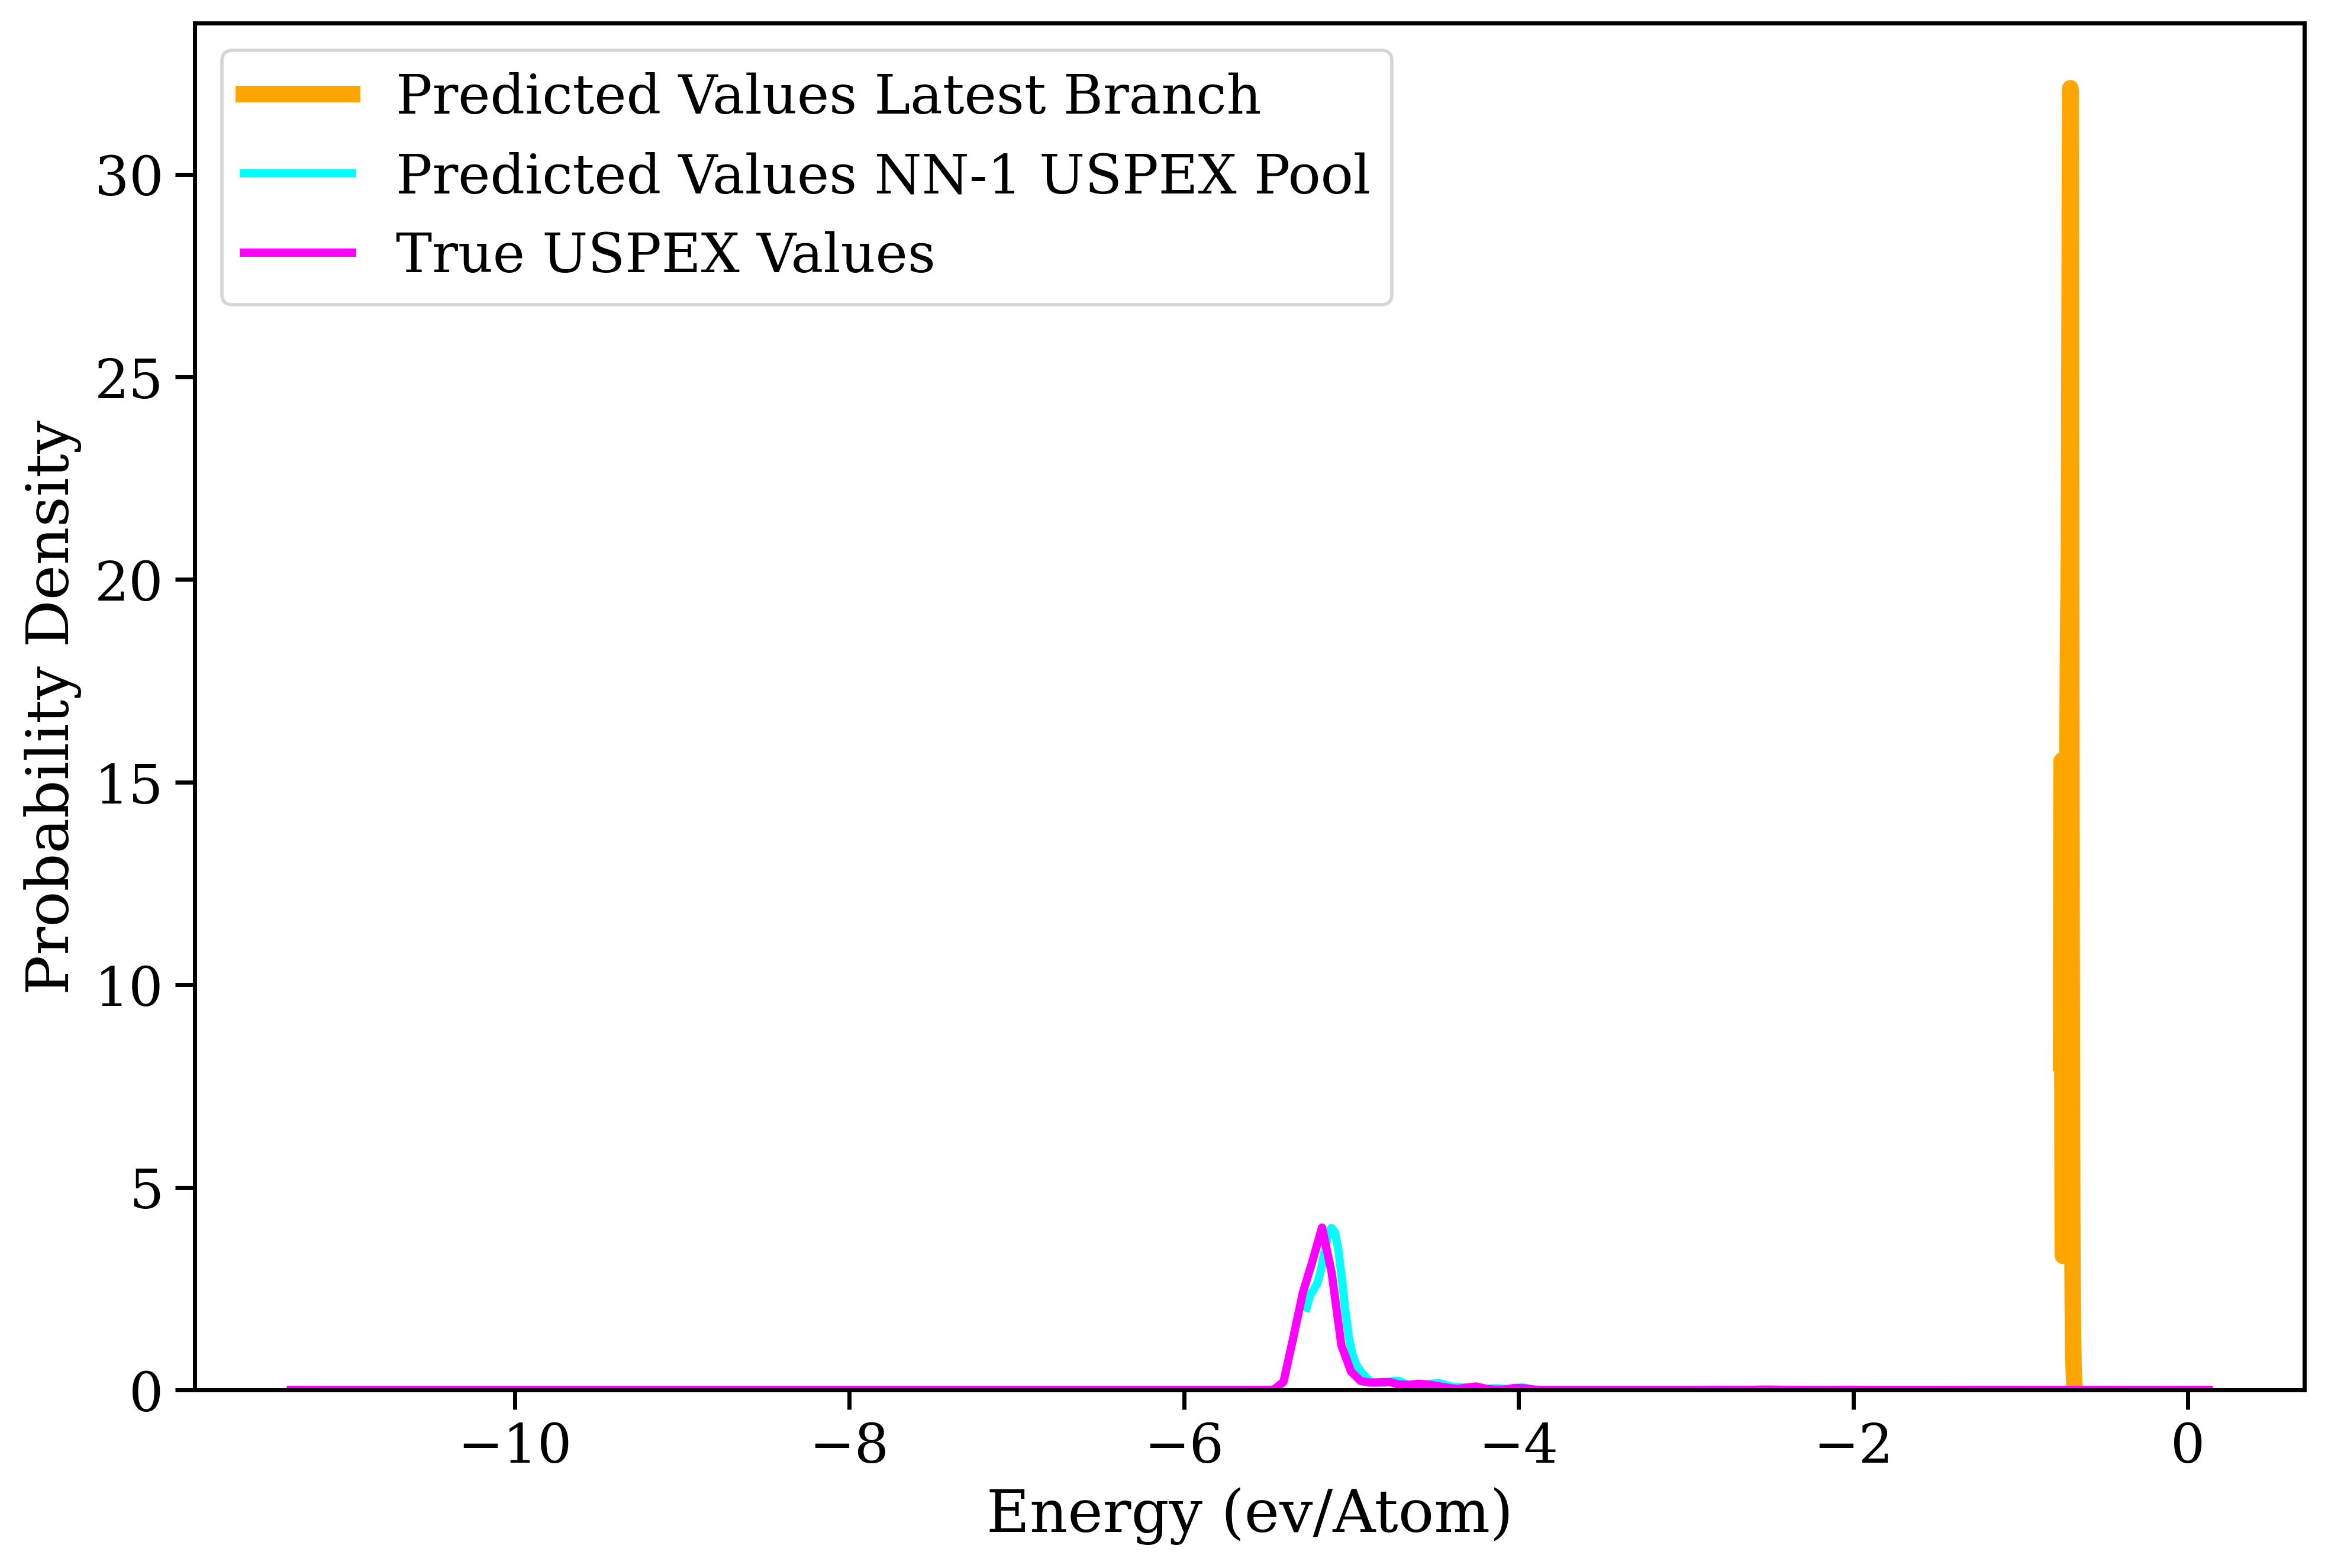

In [14]:
# EV/per atom
# all_vals_pred=angle_1_pred_train1
# all_vals_true=gb_val_true
fig = plt.figure(figsize=(11.5, 7.5), dpi=400)
fig.patch.set_facecolor('xkcd:white')

sns.set_context("notebook", font_scale=1.5)

sns.distplot(NN_1_energy_per_atom_latest_fitsnap, hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'},
             kde_kws={'clip': ((NN_1_energy_per_atom_latest_fitsnap).min(),
                               (NN_1_energy_per_atom_latest_fitsnap).max()),'linewidth':5},
             label='Predicted Values Latest Branch ')

sns.distplot(NN_1_energy_per_atom_collected_changes, hist=False, kde=True, 
             bins=int(180/5), color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'clip': ((NN_1_energy_per_atom_collected_changes).min(),
                               (NN_1_energy_per_atom_collected_changes).max()),'linewidth':2.5},
             label='Predicted Values NN-1 USPEX Pool')



sns.distplot(true_energy_per_atom, hist=False, kde=True, 
             bins=int(180/5), color = 'magenta',
             hist_kws={'edgecolor':'black'},
             kde_kws={'clip': ((true_energy_per_atom).min(),
                               (true_energy_per_atom).max()),'linewidth':2.5},
             label='True USPEX Values')

plt.legend()
plt.ylabel('Probability Density')
plt.xlabel('Energy (ev/Atom)')
plt.show()